# Memahami Data: Fondasi Analisis di Power BI
Pemahaman Data (Data Understanding) adalah tahap fundamental dalam siklus hidup ilmu data atau Knowledge Discovery in Databases (KDD). Tahap awal ini krusial karena bertujuan untuk mendapatkan pemahaman yang mendalam mengenai data sebelum melangkah ke analisis yang lebih kompleks. Keberhasilan keseluruhan proyek data mining sangat bergantung pada seberapa baik data dipahami di tahap ini.

Berikut adalah rincian aktivitas utama dalam proses memahami data:

1. Pengumpulan Data (Data Collection)
   Aktivitas ini berfokus pada penghimpunan data dari berbagai sumber, baik itu database, file (seperti CSV), API, maupun sensor. Tujuannya adalah untuk memastikan semua data yang relevan dan dibutuhkan untuk analisis telah berhasil dikumpulkan.

2. Pemrofilan Data (Data Profiling)
   Pada tahap ini, kita membuat ringkasan karakteristik dari setiap variabel. Ini mencakup identifikasi tipe data (misalnya, numerik atau kategorikal), rentang nilainya, dan distribusi frekuensinya. Selain itu, pemrofilan juga bertujuan untuk mengungkap hubungan awal antarvariabel, sering kali melalui analisis korelasi atau asosiasi.

3. Analisis Korelasi dan Asosiasi
   Fungsi dari kegiatan ini adalah untuk mengukur secara statistik seberapa kuat hubungan antarvariabel. Koefisien korelasi seperti Pearson atau Spearman digunakan untuk mengidentifikasi hubungan linier, sementara teknik asosiasi dipakai untuk menemukan pola keterkaitan antara variabel-variabel kategorikal.

4. Eksplorasi Data (Data Exploration)
   Eksplorasi data melibatkan penggunaan statistik deskriptif (seperti rata-rata, median, modus, dan standar deviasi) serta visualisasi data. Tujuannya adalah untuk memahami distribusi, mendeteksi pola, dan menggali wawasan awal dari dataset.

5. Identifikasi Masalah Kualitas Data
   Langkah ini penting untuk mendeteksi berbagai anomali dalam data, yang meliputi:

* Data Hilang (Missing Values): Menemukan adanya sel atau entri yang kosong.

* Pencilan (Outliers): Mengidentifikasi nilai-nilai ekstrem yang bisa jadi merupakan anomali atau kesalahan input.

* Duplikasi Data: Menemukan adanya data atau baris yang identik.

* Inkonsistensi Data: Memeriksa ketidakseragaman format atau nilai dalam data.

6. Validasi Data
   Validasi bertujuan untuk memastikan dua hal utama:

* Kesesuaian data dengan konteks dan kebutuhan bisnis.

* Verifikasi bahwa data yang ada secara akurat merepresentasikan fenomena atau realitas yang sedang dianalisis.

## Manfaat Utama dari Pemahaman Data
Proses pemahaman data yang solid memberikan berbagai keuntungan strategis, antara lain:

* Peningkatan Kualitas Data: Dengan mengenali masalah sejak dini, langkah-langkah pembersihan dan persiapan data menjadi jauh lebih efektif.

* Efisiensi Waktu dan Biaya: Mencegah kesalahan analisis yang mahal akibat penggunaan data yang berkualitas buruk.

* Pengambilan Keputusan yang Lebih Baik: Memberikan wawasan awal yang berharga untuk merumuskan hipotesis dan strategi analisis yang tepat.

* Peningkatan Akurasi Model: Data yang bersih dan dipahami dengan baik merupakan kunci untuk membangun model prediktif yang andal dan akurat.

## Power BI
Kita akan menggunakan Power BI untuk melakukan pemanggilan data dan melakukan proses data understanding dan eksplorasi data

Anda dapat melakukan instalasi di link berikut: https://www.microsoft.com/en-us/power-platform/products/power-bi/downloads?ocid=ORSEARCH_Bingmsockid=13aa90df998161263c3b85f79d8163f6

## Proses dalam Memahami Data
### 1. Pengumpulan Data
Dataset IRIS adalah dataset yang berisi informasi tentang tiga spesies bunga iris (Setosa, Versicolor, Virginica) dengan fitur utama yaitu; panjang dan lebar dari sepal serta petal.

#### Lokasi Data Teruntuk lokasi dari data IRIS berada dalam aiven.io (platform cloud dan AI berbasis open source):

Data IRIS petal berada di database MySQL

Data IRIS sepal berada di database PostgreSQL

#### Metode Pengumpulan Langkah untuk mengumpulkan data dilakukan menggunakan Power BI sebagai berikut:

pymysql : Digunakan untuk menghubungkan dan mengambil data dari MySQL.

psycopg2 : Digunakan untuk menghubungkan dan mengambil data dari PostgreSQL.

pandas : Digunakan untuk membaca dan mengolah data setelah diambil dari database.

#### Proses Mengumpulkan Data #####a. Menghubungkan Data dari MySQL dan PostgreSQL

Install library yang diperlukan di terminal anda

saya sarankan anda menggunakan python versi 11 untuk melakukan instalasi pycaret


In [ ]:
pip install pymysql
pip install pandas
pip install psycopg2-binary
pip install sqlalchemy
pip install python-dotenv
pip install matplotlib
pip install pycaret 

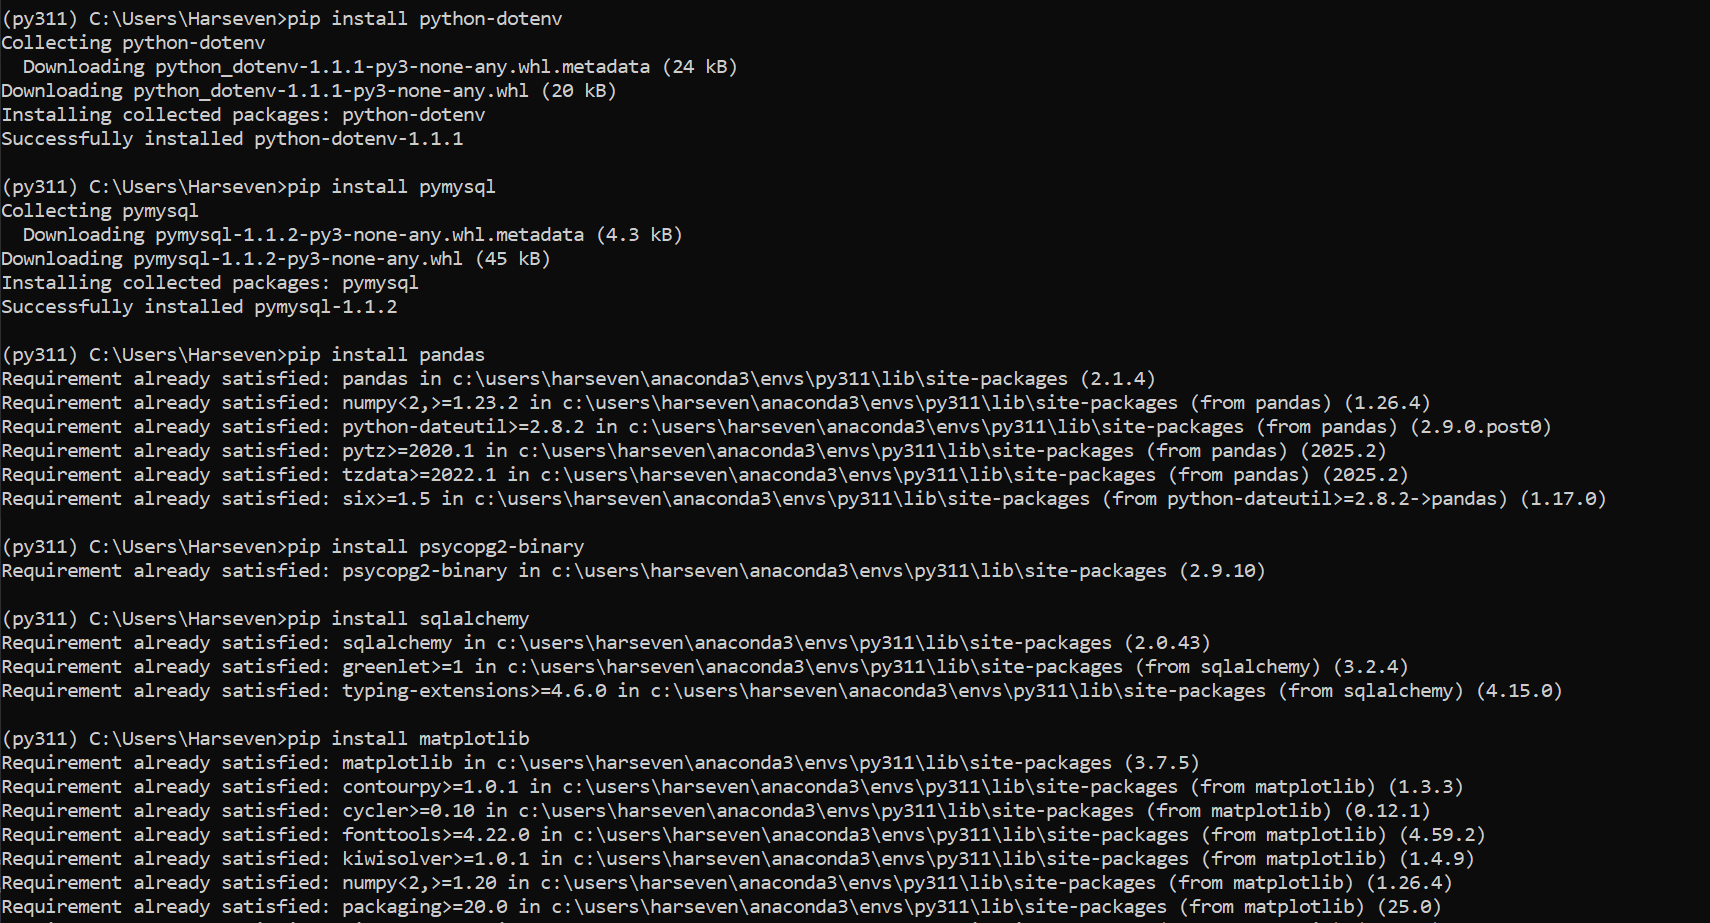

* Koneksikan database dari aiven

* Masukkan code berikut pada Power BI:

    * Masuk Power BI

    * Pilih Get Data -> More -> Python Scripting

    * Masukkan code a,b.c berikut lalu klik connect

In [1]:
import pandas as pd
from sqlalchemy import create_engine

MYSQL_HOST = "database-aplikasi-saya-mysql-muhammadazhariii1209-4402.j.aivencloud.com"
MYSQL_PORT = 14467
MYSQL_USER = "avnadmin"
MYSQL_PASSWORD = "AVNS_-m75fnNFJLYQ3JbqMc4"
MYSQL_DATABASE = "defaultdb"

PG_HOST = "database-aplikasi-saya-muhammadazhariii1209-4402.j.aivencloud.com"
PG_PORT = 14467
PG_USER = "avnadmin"
PG_PASSWORD = "AVNS_cAY9-ITh6Sy3eujURVI"
PG_DATABASE = "defaultdb"

mysql_engine = create_engine(
    f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}"
)

pg_engine = create_engine(
    f"postgresql+psycopg2://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DATABASE}"
)

mysql_query = "SELECT * FROM iris_mysql;"
df_mysql = pd.read_sql(mysql_query, mysql_engine)

pg_query = "SELECT * FROM iris_postgre;"
df_postgres = pd.read_sql(pg_query, pg_engine)

print("Data dari MySQL:")
print(df_mysql.head())

print("\nData dari PostgreSQL:")
print(df_postgres.head())

Data dari MySQL:
   id        Class  petal length  petal width
0   1  Iris-setosa           1.4          0.2
1   2  Iris-setosa           1.4          0.2
2   3  Iris-setosa           1.3          0.2
3   4  Iris-setosa           1.5          0.2
4   5  Iris-setosa           1.4          0.2

Data dari PostgreSQL:
   id        Class  sepal length  sepal width
0   1  Iris-setosa           5.1          3.5
1   2  Iris-setosa           4.9          3.0
2   3  Iris-setosa           4.7          3.2
3   4  Iris-setosa           4.6          3.1
4   5  Iris-setosa           5.0          3.6


## B. Mengambil dan menampilkan data serta menghapus file yang di upload sebelumnya

In [2]:
import os
mysql_query = "SELECT * FROM iris_mysql;"
df_mysql = pd.read_sql(mysql_query, mysql_engine)

pg_query = "SELECT * FROM iris_postgre;"
df_postgres = pd.read_sql(pg_query, pg_engine)

# Print hasil query
print("Data dari MySQL:")
print(df_mysql.head())

print("\n Data dari PostgreSQL:")
print(df_postgres.head())

#Menghapus file yang di upload sebelumnya
if os.path.exists(".env"):
    os.remove(".env")

Data dari MySQL:
   id        Class  petal length  petal width
0   1  Iris-setosa           1.4          0.2
1   2  Iris-setosa           1.4          0.2
2   3  Iris-setosa           1.3          0.2
3   4  Iris-setosa           1.5          0.2
4   5  Iris-setosa           1.4          0.2

 Data dari PostgreSQL:
   id        Class  sepal length  sepal width
0   1  Iris-setosa           5.1          3.5
1   2  Iris-setosa           4.9          3.0
2   3  Iris-setosa           4.7          3.2
3   4  Iris-setosa           4.6          3.1
4   5  Iris-setosa           5.0          3.6


## C. Menggabungkan Data dari Kedua Database

In [3]:
df_combined = pd.merge(df_postgres, df_mysql.drop(columns=['Class']), on="id", how="inner")

print("\nData gabungan:")
print(df_combined)


Data gabungan:
      id           Class  sepal length  sepal width  petal length  petal width
0      1     Iris-setosa           5.1          3.5           1.4          0.2
1      2     Iris-setosa           4.9          3.0           1.4          0.2
2      3     Iris-setosa           4.7          3.2           1.3          0.2
3      4     Iris-setosa           4.6          3.1           1.5          0.2
4      5     Iris-setosa           5.0          3.6           1.4          0.2
..   ...             ...           ...          ...           ...          ...
145  146  Iris-virginica           6.7          3.0           5.2          2.3
146  147  Iris-virginica           6.3          2.5           5.0          1.9
147  148  Iris-virginica           6.5          3.0           5.2          2.0
148  149  Iris-virginica           6.2          3.4           5.4          2.3
149  150  Iris-virginica           5.9          3.0           5.1          1.8

[150 rows x 6 columns]


## 2. Profiling Data
Profiling data termasuk langkah penting dalam memahami karakteristik dataset sebelum melakukan analisis lebih lanjut.

### Informasi tentang Dataset
Menampilkan Informasi Dataset

Data Iris mempunyai 4 feature dengan tipe data:

petal_length: Continous

petal_width: Continous

sepal_length: Continous

sepal_width: Continous

## 3. Korelasi dan Asosiasi
### Memahami Hubungan antar Variabel
Pilih Python Visual pada pilihan di visualizations dan pilih feature dan masukkan kode ini

In [5]:
from pycaret.datasets import get_data
from pycaret.anomaly import *

# df_combined = dataset 

# Use only the feature columns for anomaly detection
anomaly = df_combined[['sepal length', 'sepal width', 'petal length', 'petal width']]

exp_name = setup(data=anomaly)
abod = create_model('abod', fraction=0.05)
abod_df = assign_model(abod) 

outlier_df = abod_df[abod_df['Anomaly'] == 0]
outlier_df

sepal length  sepal width  petal length  petal width  Anomaly  \
0             5.1          3.5           1.4          0.2        0   
1             4.9          3.0           1.4          0.2        0   
2             4.7          3.2           1.3          0.2        0   
3             4.6          3.1           1.5          0.2        0   
4             5.0          3.6           1.4          0.2        0   
..            ...          ...           ...          ...      ...   
145           6.7          3.0           5.2          2.3        0   
146           6.3          2.5           5.0          1.9        0   
147           6.5          3.0           5.2          2.0        0   
148           6.2          3.4           5.4          2.3        0   
149           5.9          3.0           5.1          1.8        0   

     Anomaly_Score  
0      -556.251421  
1      -400.000928  
2       -93.421993  
3       -99.229221  
4       -82.176201  
..             ...  
145     -13.831461  
146      -9.110201  
147     -20.571707  
148      -6.345400  
149     -28.205616  

[142 rows x 6 columns]

* seharusnya pada data diatas hanya tersisa 142 data karean code diatas mendeteksi anomaly=0

In [6]:
# Simpan hasil ke file CSV
outlier_df.to_csv("outlier_abod.csv", index=False)

Tapi pada csv diatas sudah bersih 142 data


### Seleksi outlier menggunakan metode KNN

In [7]:
from pycaret.datasets import get_data
from pycaret.anomaly import *

# Use only the feature columns for anomaly detection
anomaly = df_combined[['sepal length', 'sepal width', 'petal length', 'petal width']]

exp_name = setup(data=anomaly)
knn = create_model('knn', fraction=0.05)
knn_df = assign_model(knn) 

knn_outlier_df = knn_df[abod_df['Anomaly'] == 0]
knn_outlier_df

sepal length  sepal width  petal length  petal width  Anomaly  \
0             5.1          3.5           1.4          0.2        0   
1             4.9          3.0           1.4          0.2        0   
2             4.7          3.2           1.3          0.2        0   
3             4.6          3.1           1.5          0.2        0   
4             5.0          3.6           1.4          0.2        0   
..            ...          ...           ...          ...      ...   
145           6.7          3.0           5.2          2.3        0   
146           6.3          2.5           5.0          1.9        0   
147           6.5          3.0           5.2          2.0        0   
148           6.2          3.4           5.4          2.3        0   
149           5.9          3.0           5.1          1.8        0   

     Anomaly_Score  
0         0.141421  
1         0.173205  
2         0.264575  
3         0.264575  
4         0.244949  
..             ...  
145       0.374166  
146       0.479583  
147       0.387298  
148       0.624500  
149       0.360555  

[142 rows x 6 columns]

In [8]:
# Simpan hasil ke file CSV
knn_outlier_df.to_csv("outlier_knn.csv", index=False)

### Seleksi outlier menggunakan metode LOF

In [9]:
from pycaret.datasets import get_data
from pycaret.anomaly import *

# Use only the feature columns for anomaly detection
anomaly = df_combined[['sepal length', 'sepal width', 'petal length', 'petal width']]

exp_name = setup(data=anomaly)
lof = create_model('lof', fraction=0.05)
lof_df = assign_model(lof) 

lof_outlier_df = lof_df[abod_df['Anomaly'] == 0]
lof_outlier_df

sepal length  sepal width  petal length  petal width  Anomaly  \
0             5.1          3.5           1.4          0.2        0   
1             4.9          3.0           1.4          0.2        0   
2             4.7          3.2           1.3          0.2        0   
3             4.6          3.1           1.5          0.2        0   
4             5.0          3.6           1.4          0.2        0   
..            ...          ...           ...          ...      ...   
145           6.7          3.0           5.2          2.3        0   
146           6.3          2.5           5.0          1.9        0   
147           6.5          3.0           5.2          2.0        0   
148           6.2          3.4           5.4          2.3        0   
149           5.9          3.0           5.1          1.8        0   

     Anomaly_Score  
0         0.976302  
1         1.008758  
2         1.019841  
3         1.049882  
4         0.958473  
..             ...  
145       0.978474  
146       1.004232  
147       0.980847  
148       1.021819  
149       1.011326  

[142 rows x 6 columns]

In [10]:
# Simpan hasil ke file CSV
lof_outlier_df.to_csv("outlier_lof.csv", index=False)